In [30]:
import pandas as pd
from scipy.stats import trim_mean
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar dataset
archivo = "/content/state.csv"  # Cambia esto por la ruta real del archivo
df = pd.read_csv(archivo)

# Información general del dataset
print("Información del dataset:")
print(df.info())

print("Dataset: State")
print(df)


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB
None
Dataset: State
             State  Population  Murder.Rate Abbreviation
0          Alabama     4779736          5.7           AL
1           Alaska      710231          5.6           AK
2          Arizona     6392017          4.7           AZ
3         Arkansas     2915918          5.6           AR
4       California    37253956          4.4           CA
5         Colorado     5029196          2.8           CO
6      Connecticut     3574097          2.4           CT
7         Delaware      897934          5.8           DE
8          Florida  

In [31]:
# Seleccionar segunda y tercera columna
col2 = df.iloc[:, 1]  # Segunda columna
col3 = df.iloc[:, 2]  # Tercera columna

# Función para calcular estadísticos
def calcular_estadisticos(columna):
    estadisticos = {
        "Media": round(columna.mean(), 3),
        "Mediana": round(columna.median(), 3),
        "Desviación estándar": round(columna.std(), 3),
        "Varianza": round(columna.var(), 3),
        "Mínimo": round(columna.min(), 3),
        "Máximo": round(columna.max(), 3),
        "Rango": round(columna.max() - columna.min(), 3),
        "Q1 (25%)": round(columna.quantile(0.25), 3),
        "Q2 (50%) (Mediana)": round(columna.median(), 3),
        "Q3 (75%)": round(columna.quantile(0.75), 3),
        "IQR (Q3 - Q1)": round(columna.quantile(0.75) - columna.quantile(0.25), 3),
        "Trim Mean (10%)": round(trim_mean(columna, proportiontocut=0.1), 3)
    }
    return pd.Series(estadisticos)

# Crear tabla de resultados
tabla_estadisticos = pd.DataFrame({
    "Population": calcular_estadisticos(col2),
    "MurderRate": calcular_estadisticos(col3)
})

# Mostrar resultados
print(tabla_estadisticos)

                       Population  MurderRate
Media                6.162876e+06       4.066
Mediana              4.436370e+06       4.000
Desviación estándar  6.848235e+06       1.916
Varianza             4.689833e+13       3.670
Mínimo               5.636260e+05       0.900
Máximo               3.725396e+07      10.300
Rango                3.669033e+07       9.400
Q1 (25%)             1.833004e+06       2.425
Q2 (50%) (Mediana)   4.436370e+06       4.000
Q3 (75%)             6.680312e+06       5.550
IQR (Q3 - Q1)        4.847308e+06       3.125
Trim Mean (10%)      4.783697e+06       3.945


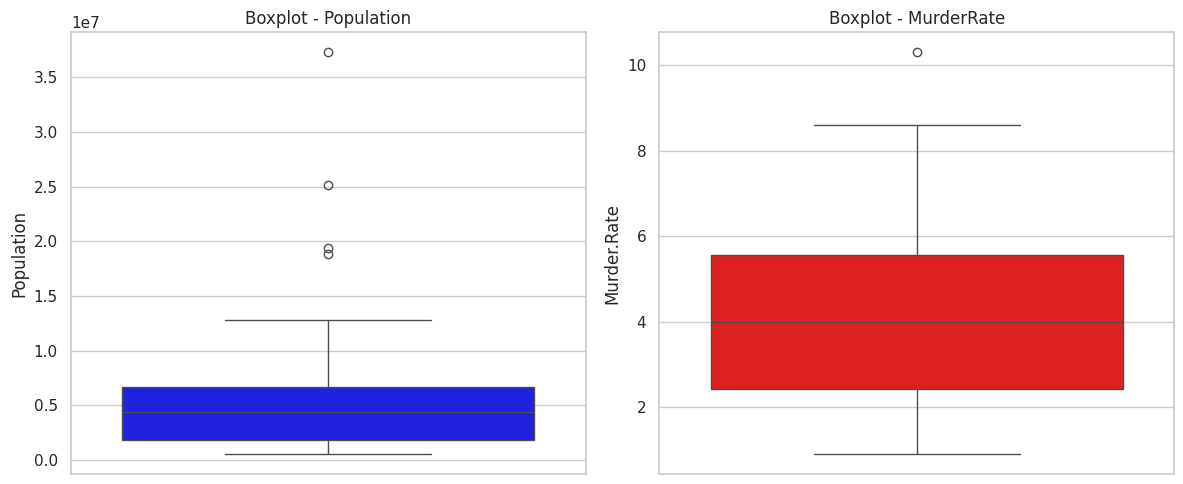

In [32]:
# Crear figura con dos gráficos separados
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot para la segunda columna
sns.boxplot(y=col2, ax=axes[0], color="blue")
axes[0].set_title("Boxplot - Population")

# Boxplot para la tercera columna
sns.boxplot(y=col3, ax=axes[1], color="red")
axes[1].set_title("Boxplot - MurderRate")

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()


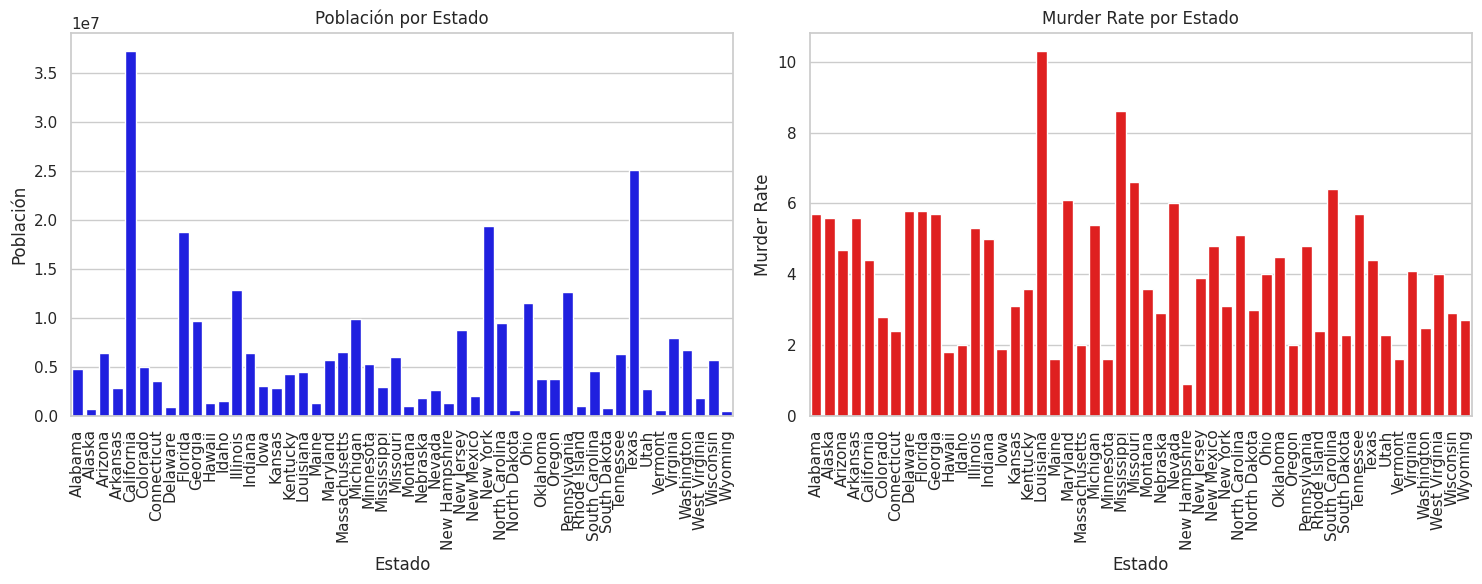

In [37]:
# Extraer los nombres de los estados (asumo que están en la primera columna)
states = df.iloc[:, 0]

# Crear figura con dos gráficos separados
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras para Population
sns.barplot(x=states, y=col2, ax=axes[0], color="blue")
axes[0].set_title("Población por Estado")
axes[0].set_xlabel("Estado")
axes[0].set_ylabel("Población")
axes[0].tick_params(axis='x', rotation=90)  # Rotar etiquetas para mejor lectura

# Gráfico de barras para MurderRate
sns.barplot(x=states, y=col3, ax=axes[1], color="red")
axes[1].set_title("Murder Rate por Estado")
axes[1].set_xlabel("Estado")
axes[1].set_ylabel("Murder Rate")
axes[1].tick_params(axis='x', rotation=90)

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()



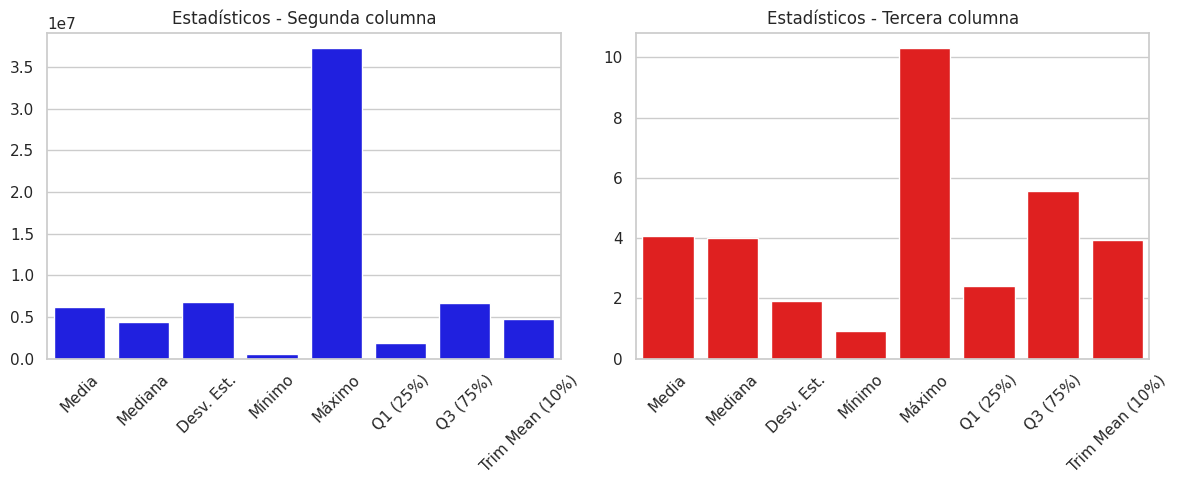

In [34]:
from scipy.stats import trim_mean

# Crear diccionarios con los valores de los estadísticos
estadisticos_col2 = {
    "Media": col2.mean(),
    "Mediana": col2.median(),
    "Desv. Est.": col2.std(),
    "Mínimo": col2.min(),
    "Máximo": col2.max(),
    "Q1 (25%)": col2.quantile(0.25),
    "Q3 (75%)": col2.quantile(0.75),
    "Trim Mean (10%)": trim_mean(col2, 0.1)
}

estadisticos_col3 = {
    "Media": col3.mean(),
    "Mediana": col3.median(),
    "Desv. Est.": col3.std(),
    "Mínimo": col3.min(),
    "Máximo": col3.max(),
    "Q1 (25%)": col3.quantile(0.25),
    "Q3 (75%)": col3.quantile(0.75),
    "Trim Mean (10%)": trim_mean(col3, 0.1)
}

# Crear figura con dos gráficos separados
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Graficar los estadísticos en histogramas de barras
sns.barplot(x=list(estadisticos_col2.keys()), y=list(estadisticos_col2.values()), ax=axes[0], color="blue")
axes[0].set_title("Estadísticos - Population")
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=list(estadisticos_col3.keys()), y=list(estadisticos_col3.values()), ax=axes[1], color="red")
axes[1].set_title("Estadísticos - MurderRate")
axes[1].tick_params(axis='x', rotation=45)

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()


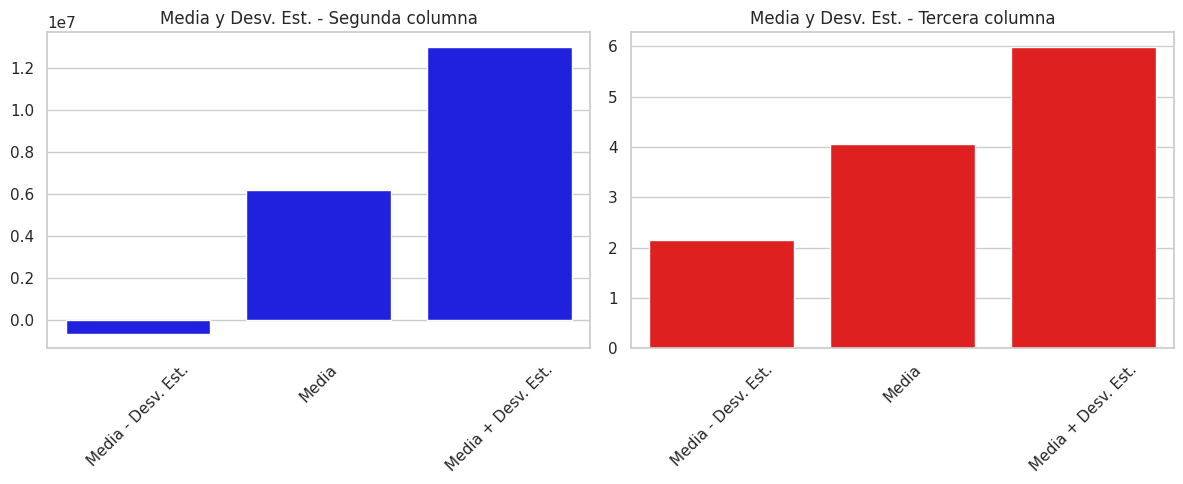

In [35]:
# Crear figura con dos gráficos separados
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Datos para la segunda columna
media_col2 = col2.mean()
std_col2 = col2.std()
valores_col2 = [media_col2 - std_col2, media_col2, media_col2 + std_col2]
nombres_col2 = ["Media - Desv. Est.", "Media", "Media + Desv. Est."]

# Datos para la tercera columna
media_col3 = col3.mean()
std_col3 = col3.std()
valores_col3 = [media_col3 - std_col3, media_col3, media_col3 + std_col3]
nombres_col3 = ["Media - Desv. Est.", "Media", "Media + Desv. Est."]

# Graficar los valores en barras
sns.barplot(x=nombres_col2, y=valores_col2, ax=axes[0], color="blue")
axes[0].set_title("Media y Desv. Est. - Population")
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=nombres_col3, y=valores_col3, ax=axes[1], color="red")
axes[1].set_title("Media y Desv. Est. - MurderRate")
axes[1].tick_params(axis='x', rotation=45)

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()


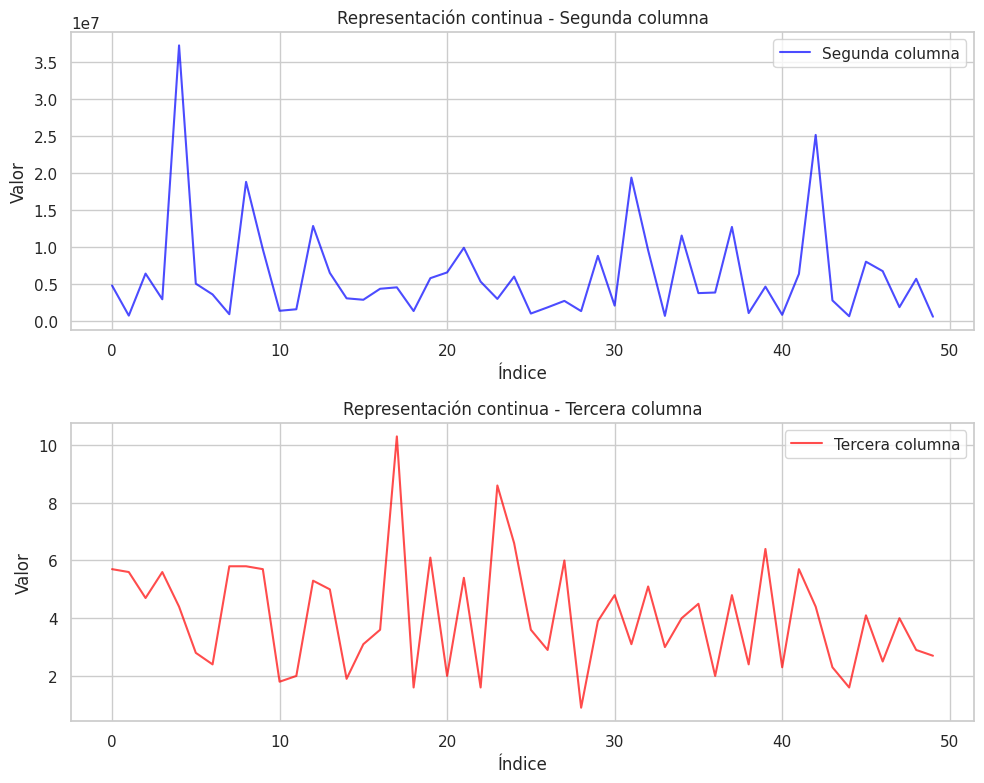

In [36]:
# Crear figura con dos gráficos separados
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Crear linspace para el eje X con el mismo número de puntos que las columnas
x_values = np.linspace(0, len(col2) - 1, len(col2))

# Graficar la segunda columna
axes[0].plot(x_values, col2, label="Population", color="blue", alpha=0.7)
axes[0].set_title("Representación continua - Segunda columna")
axes[0].set_xlabel("Índice")
axes[0].set_ylabel("Valor")
axes[0].legend()
axes[0].grid(True)

# Graficar la tercera columna
axes[1].plot(x_values, col3, label="MurderRate", color="red", alpha=0.7)
axes[1].set_title("Representación continua - Tercera columna")
axes[1].set_xlabel("Índice")
axes[1].set_ylabel("Valor")
axes[1].legend()
axes[1].grid(True)

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()
